In [2]:
import chic_functions
import importlib
import numpy as np
import plotting_input as inp
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

importlib.reload(chic_functions)
import matplotlib.pyplot as plt

In [3]:
profs = [
    'M1_Fe32-5_wSi010_M000.res', 'M1_Fe32-5_wSi020_M000.res', 'M1_Fe32-5_wSi030_M000.res', 
    'M1_Fe32-5_wSi040_M000.res', 'M1_Fe32-5_wSi050_M000.res', 'M1_Fe32-5_wSi060_M000.res', 
    'M1_Fe32-5_wSi070_M000.res', 'M1_Fe32-5_wSi080_M000.res', 'M1_Fe32-5_wSi090_M000.res', 
    'M1_Fe32-5_wSi100_M000.res', 'M1_Fe32-5_wSi110_M000.res', 'M1_Fe32-5_wSi120_M000.res', 
    'M1_Fe32-5_wSi130_M000.res', 'M1_Fe32-5_wSi140_M000.res', 'M1_Fe32-5_wSi150_M000.res'
]

planets, cores, textures = chic_functions.prof_data2lib(profs,prem_lbl='PREM',colors=inp.cmap_plasma)

Fitted parameters: a = -12521.17971871501, b = 2277.5819393920556


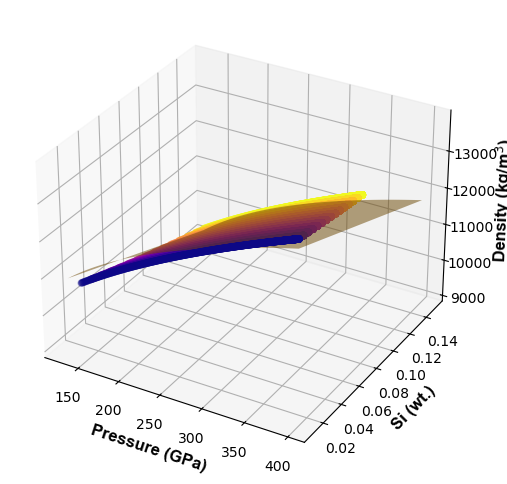

In [4]:
# Aggregated data arrays for fitting
all_p, all_x_si, all_rho = [], [], []

# Create a 3D plot of the data
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for prof in profs:
    x_si = float(prof[13:15])/100
    x_si = np.ones(len(cores[prof]['P']))*x_si
    p = cores[prof]['P']/1.e9
    rho = cores[prof]['rho']
    
    if np.shape(p) != np.shape(rho) and np.shape(p) != np.shape(x_si):
        print('Data is not the same shape')
    
    # Aggregate data for fitting
    all_p.extend(p), all_x_si.extend(x_si), all_rho.extend(rho)

    ax.scatter(p, x_si, rho, label='Data Points', color=textures[prof]['color'])

all_p = np.array(all_p)
all_x_si = np.array(all_x_si)
all_rho = np.array(all_rho)

# Define the model function for fitting: rho(p, x_si) = a * x_si * log(b * p)
def model_function(data, a, b):
    p, x_si = data
    return a * x_si + b * np.log(p)

# Perform the curve fit on the aggregated data
params, _ = curve_fit(model_function, (all_p, all_x_si), all_rho, p0=[1, 1])  # Initial guess for a, b
a, b = params  # Extract fitted parameters

print(f"Fitted parameters: a = {a}, b = {b}")

# Create a mesh grid for plotting the fitted surface
p_grid = np.linspace(min(all_p), max(all_p), 50)
x_si_grid = np.linspace(min(all_x_si), max(all_x_si), 50)
P, X_SI = np.meshgrid(p_grid, x_si_grid)

# Calculate the fitted rho values on the grid
RHO_fit = a*X_SI + b*np.log(P)

# Plot the fitted surface
ax.plot_surface(P, X_SI, RHO_fit, color='orange', alpha=0.5, rstride=100, cstride=100, edgecolor='none', label='Fitted Surface')

ax.set_xlabel('Pressure (GPa)', fontweight='bold', font='Arial', fontsize=12)
ax.set_ylabel('Si (wt.)', fontweight='bold',font='Arial', fontsize=12)
ax.set_zlabel('Density (kg/m$^3$)', fontweight='bold',font='Arial', fontsize=12)

plt.show()

In [5]:
# Function to update viewing angles interactively
def update_view(angle_azim=0, angle_elev=30):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Re-plot scatter points and surface, but don't redo calculations
    for prof in profs:
        x_si = float(prof[13:15]) / 100
        x_si_array = np.ones(len(cores[prof]['P'])) * x_si
        p = cores[prof]['P']/1.e9
        rho = cores[prof]['rho']
        ax.scatter(p, x_si_array, rho/1000, color=textures[prof]['color'], label=f'Data {prof}')

    # Plot the precomputed surface
    ax.plot_surface(P, X_SI, RHO_fit/1000, color='orange', alpha=0.5, rstride=100, cstride=100, edgecolor='none')

    # Update view
    ax.view_init(elev=angle_elev, azim=angle_azim)

    ax.set_xlabel('Pressure (GPa)', fontweight='bold', font='Arial', fontsize=12)
    ax.set_ylabel('Si (wt.)', fontweight='bold',font='Arial', fontsize=12)
    ax.set_zlabel('Density (g/cm$^3$)', fontweight='bold',font='Arial', fontsize=12)
    
    plt.show()

# Create interactive widget for azimuth and elevation
interact(update_view, 
         angle_azim=FloatSlider(value=0, min=0, max=360, step=1, description='Azimuth'),
         angle_elev=FloatSlider(value=30, min=-90, max=90, step=1, description='Elevation'))

interactive(children=(FloatSlider(value=0.0, description='Azimuth', max=360.0, step=1.0), FloatSlider(value=30…

<function __main__.update_view(angle_azim=0, angle_elev=30)>

Core Mass Fraction: 32.34%
Core Mass Fraction: 32.34%
Core Mass Fraction: 32.34%
Core Mass Fraction: 32.34%
Core Mass Fraction: 32.34%
Core Mass Fraction: 32.34%
Core Mass Fraction: 32.34%
Core Mass Fraction: 32.34%
Core Mass Fraction: 32.34%
Core Mass Fraction: 32.33%
Core Mass Fraction: 32.34%
Core Mass Fraction: 32.33%
Core Mass Fraction: 32.33%
Core Mass Fraction: 32.33%
Core Mass Fraction: 32.33%


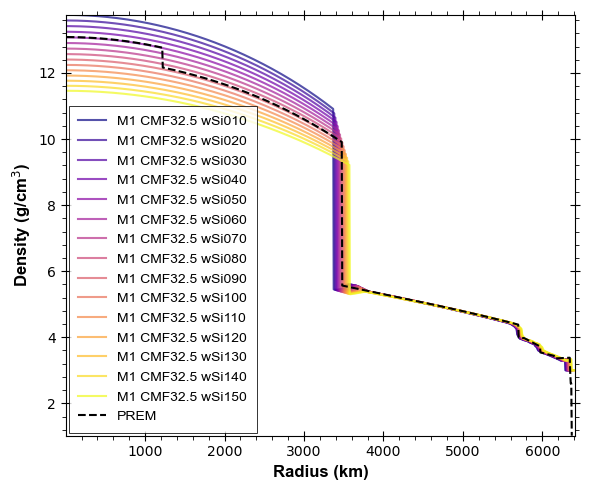

In [17]:
fig, ax = plt.subplots(1,1,figsize=(6,5))


for prof in profs:
    ax.plot(planets[prof]['r'], planets[prof]['rho']/1000, label=textures[prof]['label'], linestyle=textures[prof]['linestyle'], color=textures[prof]['color'], alpha = 0.7)
    m = 0 
    for i in range(len(planets[prof]['r'])-1):
        m += 4/3*np.pi*((planets[prof]['r'][i+1]*1000)**3-(planets[prof]['r'][i]*1000)**3)*planets[prof]['rho'][i]

    m_c = 0
    for i in range(len(cores[prof]['r'])-1):
        m_c += 4/3*np.pi*((cores[prof]['r'][i+1]*1000)**3-(cores[prof]['r'][i]*1000)**3)*cores[prof]['rho'][i]
    print(f'Core Mass Fraction: {m_c/m:.2%}')

ax.plot(planets['PREM']['r'], planets['PREM']['rho']/1000, 'k', label=textures['PREM']['label'], linestyle=textures['PREM']['linestyle'])
   
ax.set_xlabel('Radius (km)', fontweight='bold', font='Arial', fontsize=12)
ax.set_ylabel('Density (g/cm$^3$)', fontweight='bold',font='Arial', fontsize=12)

ax.tick_params(axis='both', which='major', length=7, direction='inout', top=True, right=True)
ax.tick_params(axis='both', which='minor', length=3, direction='out', top=True, right=True)
ax.xaxis.set_minor_locator(plt.MultipleLocator(200))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.4))

ax.autoscale(tight=True)

legend = ax.legend(prop={'family': 'Arial'})
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(.7)
legend.get_frame().set_boxstyle("Square")

plt.tight_layout()

8.51%


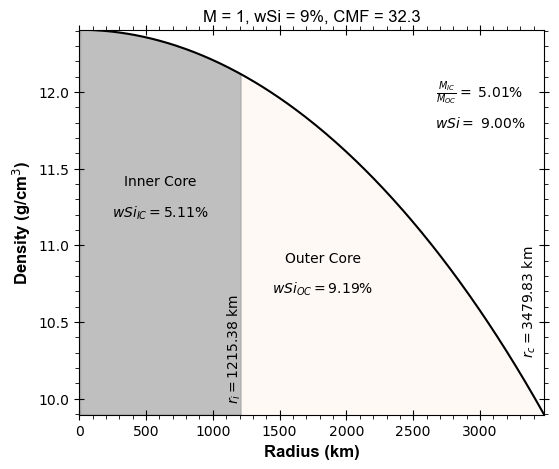

In [14]:
prof = 'M1_Fe32-5_wSi090_M000.res'
ri = 190
wSi = 0.09

n=cores[prof]['n'][0] - 1
ind_ri = n - ri

M_IC, M_OC = 0, 0
for i in range(ind_ri):
    M_OC += 4/3*np.pi*((cores[prof]['r'][i]*1000)**3-(cores[prof]['r'][i+1]*1000)**3)*cores[prof]['rho'][i]
for i in range(n-ind_ri):
    j = ind_ri + i
    M_IC += 4/3*np.pi*((cores[prof]['r'][j]*1000)**3-(cores[prof]['r'][j+1]*1000)**3)*cores[prof]['rho'][j]

M_C = M_IC + M_OC

wSi_OC = wSi * M_C / (5/9 * M_IC + M_OC)
wSi_IC = 5/9 * wSi_OC

check = wSi_IC * M_IC + wSi_OC * M_OC
error = check - M_C*wSi
print(f'{(wSi_OC*M_OC-wSi_IC*M_IC)/M_C:.2%}')
if (error) > 1e-7:
    print(f'Mass conservation error is {error*1000} g')

fig, ax = plt.subplots(1,1,figsize=(6,5))
ax.plot(cores[prof]['r'], cores[prof]['rho']/1000,'k', label='Core Density')
# fill below inner core boundary
ax.fill_between(cores[prof]['r'][ind_ri+1:n], cores[prof]['rho'][ind_ri+1:n]/1000, cores[prof]['rho'][0]/1000,color = 'grey', alpha=0.5)
ax.fill_between(cores[prof]['r'][0:ind_ri+1], cores[prof]['rho'][0:ind_ri+1]/1000, cores[prof]['rho'][0]/1000,color = 'seashell', alpha=0.5)
ax.set_title(r'M = 1, wSi = 9%, CMF = 32.3', fontweight='bold', font='Arial', fontsize=12)
ax.set_xlabel('Radius (km)', fontweight='bold', font='Arial', fontsize=12)
ax.set_ylabel('Density (g/cm$^3$)', fontweight='bold',font='Arial', fontsize=12)
ax.text(cores[prof]['r'][ind_ri]/2, cores[prof]['rho'][ind_ri]/1000-.7, 'Inner Core', fontsize=10, ha='center', va='center')
ax.text(cores[prof]['r'][ind_ri]/2, cores[prof]['rho'][ind_ri]/1000-.9, r'$wSi_{IC}=$'+f'{wSi_IC:.2%}', fontsize=10, ha='center', va='center')
ax.text(cores[prof]['r'][ind_ri]*1.5, cores[prof]['rho'][ind_ri]/1000-1.2, 'Outer Core', fontsize=10, ha='center', va='center')
ax.text(cores[prof]['r'][ind_ri]*1.5, cores[prof]['rho'][ind_ri]/1000-1.4, r'$wSi_{OC}=$'+f'{wSi_OC:.2%}', fontsize=10, ha='center', va='center')
ax.text(3000, 12, r'$\frac{M_{IC}}{M_{OC}}=$'+f' {M_IC/M_OC:.2%}', fontsize=10, ha='center', va='center')
ax.text(3000, 11.8, r'$wSi=$'+f' {wSi:.2%}', fontsize=10, ha='center', va='center')
ax.text(cores[prof]['r'][ind_ri]*0.9,10,r'$r_i =$'+f'{(cores[prof]["r"][ind_ri]):.2f} km', fontsize=10, rotation = 90)
ax.text(cores[prof]['r'][0]*0.95,10.3,r'$r_c =$'+f'{(cores[prof]["r"][0]):.2f} km', fontsize=10, rotation = 90)
ax.tick_params(axis='both', which='major', length=7, direction='inout', top=True, right=True)
ax.tick_params(axis='both', which='minor', length=3, direction='out', top=True, right=True)
ax.xaxis.set_minor_locator(plt.MultipleLocator(100))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.autoscale(tight=True)


In [18]:
prof = 'M1_Fe32-5_wSi090_M000.res'
ri = 542
wSi = 0.09

n=cores[prof]['n'][0] - 1

ind_ri = n - ri

M_IC, M_OC = 0, 0
for i in range(ind_ri):
    M_OC += 4/3*np.pi*(cores[prof]['r'][i]**3-cores[prof]['r'][i+1]**3)*cores[prof]['rho'][i]
for i in range(n-ind_ri):
    j = ind_ri + i
    M_IC += 4/3*np.pi*(cores[prof]['r'][j]**3-cores[prof]['r'][j+1]**3)*cores[prof]['rho'][j]

M_C = M_IC + M_OC

wSi_OC = wSi * M_C / (5/9 * M_IC + M_OC)
wSi_IC = 5/9 * wSi_OC

check = wSi_IC * M_IC + wSi_OC * M_OC
error = check - M_C*wSi
print(f'{(wSi_OC*M_OC-wSi_IC*M_IC)/M_C:.2%}')
if (error) > 1e-7:
    print(f'Mass conservation error is {error*1000} g')

-8.68%


In [71]:
# accounting for total Iron in Planet:

def mass(r, rho):
    # check if r and rho have the same length
    if len(r) != len(rho):
        raise ValueError("ERROR: mass: r and rho must have the same length")
    
    n = len(r)
    
    M = 0
    for i in range(n-1, 0, -1):
        M += 4/3 * np.pi * (r[i-1]**3 - r[i]**3) * rho[i]
    print(r[i-1], r[0])
    return M

Mp = mass(planets[prof]['r']*1000, planets[prof]['rho'])
Mc = mass(cores[prof]['r']*1000, cores[prof]['rho'])

XFe = 0.37
X_CMF = (Mp * XFe - (Mp - Mc) * 0.0663) / Mp
XFe = (Mp * XFe - Mc * 0.09) / Mp
print(f'XCMF: {X_CMF:.2%}', f'XCMF: {Mc/Mp:.2%}')
print(f'XFe: {XFe:.2%}')

6372611.9685449 6372611.9685449
3479827.3287933 3479827.3287933
XCMF: 32.51% XCMF: 32.29%
XFe: 34.09%
